#**Data Visualization & Data Wrangling Project**
<hr>   

**Alan Dodi Amdani**

# **Boosting Grades: A Fun Dive into Student Success with Data**
<hr>

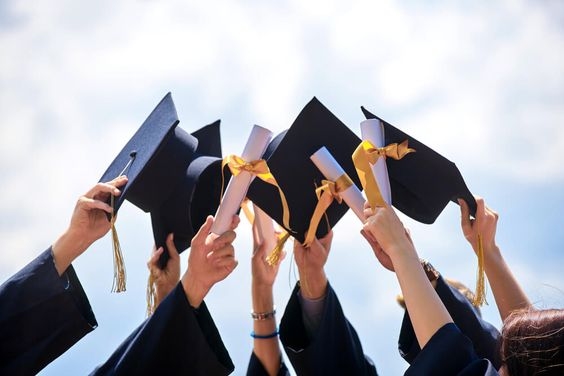

# **Contents**
<hr>

1. Data Understanding
2. Exploratory Data Analysis (EDA)
3. Data Visualization with TABLEAU

#**1. Data Understanding**
<hr>

The dataset comprising detailed information on 2,392 high school students serves as an ideal foundation for a thorough analysis of student performance. This dataset is particularly valuable because it encompasses a wide range of variables that are known to influence academic outcomes. By including demographic data, such as age, gender, and socioeconomic status, the dataset allows for an examination of how these factors correlate with student achievement, shedding light on potential disparities and areas where additional support may be needed.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_matrix = pd.read_csv("/content/Student_performance_data _.csv")
df_matrix1 = pd.get_dummies(df_matrix, columns=['Gender', 'Ethnicity'])

**The df_matrix is used for correlation analysis because the correlation matrix reveals the relationships between the numerical columns.**


**The df is used for data exploration, as the DataFrame has already had these values swapped to enhance chart readability.**

In [5]:
df = pd.read_csv('/content/data.csv')
print(df.head())

   Age  Gender  Ethnicity ParentalEducation  StudyTimeWeekly  Absences  \
0   17  Female  Caucasian      Some College        19.833723         7   
1   18    Male  Caucasian       High School        15.408756         0   
2   15    Male      Asian        Bachelor's         4.210570        26   
3   17  Female  Caucasian        Bachelor's        10.028829        14   
4   17  Female  Caucasian      Some College         4.672495        17   

  Tutoring ParentalSupport Extracurricular Sports Music Volunteering  \
0      Yes        Moderate              No     No   Yes           No   
1       No             Low              No     No    No           No   
2       No        Moderate              No     No    No           No   
3       No            High             Yes     No    No           No   
4      Yes            High              No     No    No           No   

        GPA  GradeClass  
0  2.929196         2.0  
1  3.042915         1.0  
2  0.112602         4.0  
3  2.054218       

In [6]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2149 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   object 
 7   ParentalSupport    2180 non-null   object 
 8   Extracurricular    2392 non-null   object 
 9   Sports             2392 non-null   object 
 10  Music              2392 non-null   object 
 11  Volunteering       2392 non-null   object 
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 261.8+ KB


### **The dataset is complete and its format is appropriate. Next, examine the outliers to ensure they are not indicative of any issues or anomalies.**

In [8]:
df.describe()

,Age,StudyTimeWeekly,Absences,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,1.906186,2.983696
std,1.123798,5.652774,8.467417,0.915156,1.233908
min,15.000000,0.001057,0.000000,0.000000,0.000000
25%,15.000000,5.043079,7.000000,1.174803,2.000000
50%,16.000000,9.705363,15.000000,1.893393,4.000000
75%,17.000000,14.408410,22.000000,2.622216,4.000000
max,18.000000,19.978094,29.000000,4.000000,4.000000


In [9]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
duplicate_rows

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass


In [10]:
from scipy import stats

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on a Z-score threshold (e.g., 3 or -3)
outliers = (abs(z_scores) > 3).any(axis=1)

# Display rows with outliers
outlier_rows = df[outliers]
print(outlier_rows)

Empty DataFrame
Columns: [Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


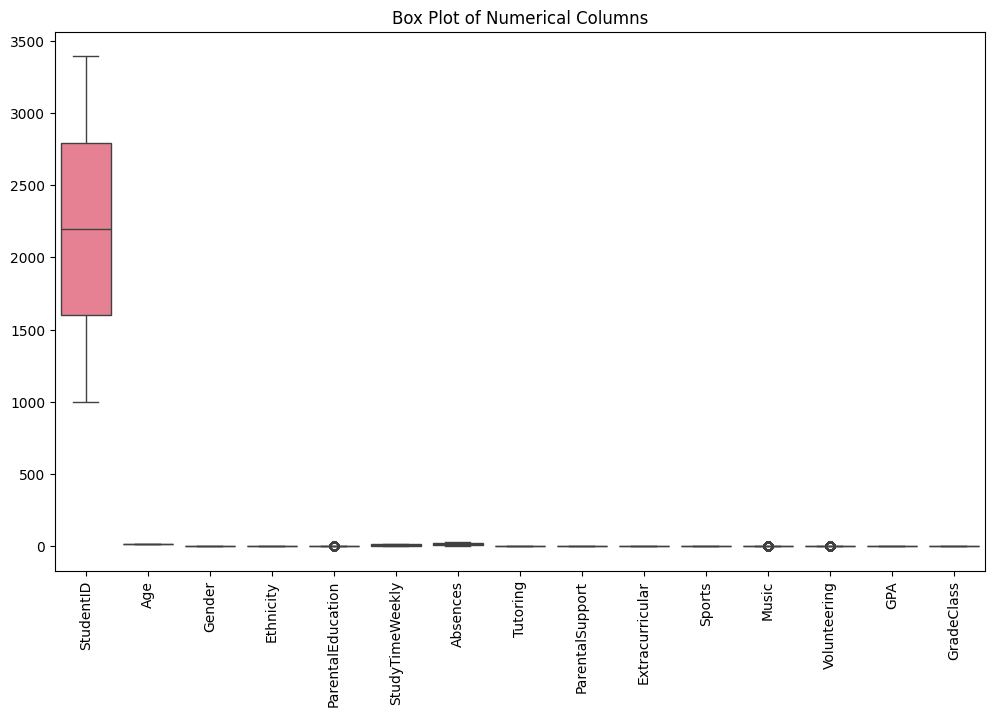

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot for each numerical column
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_matrix)
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

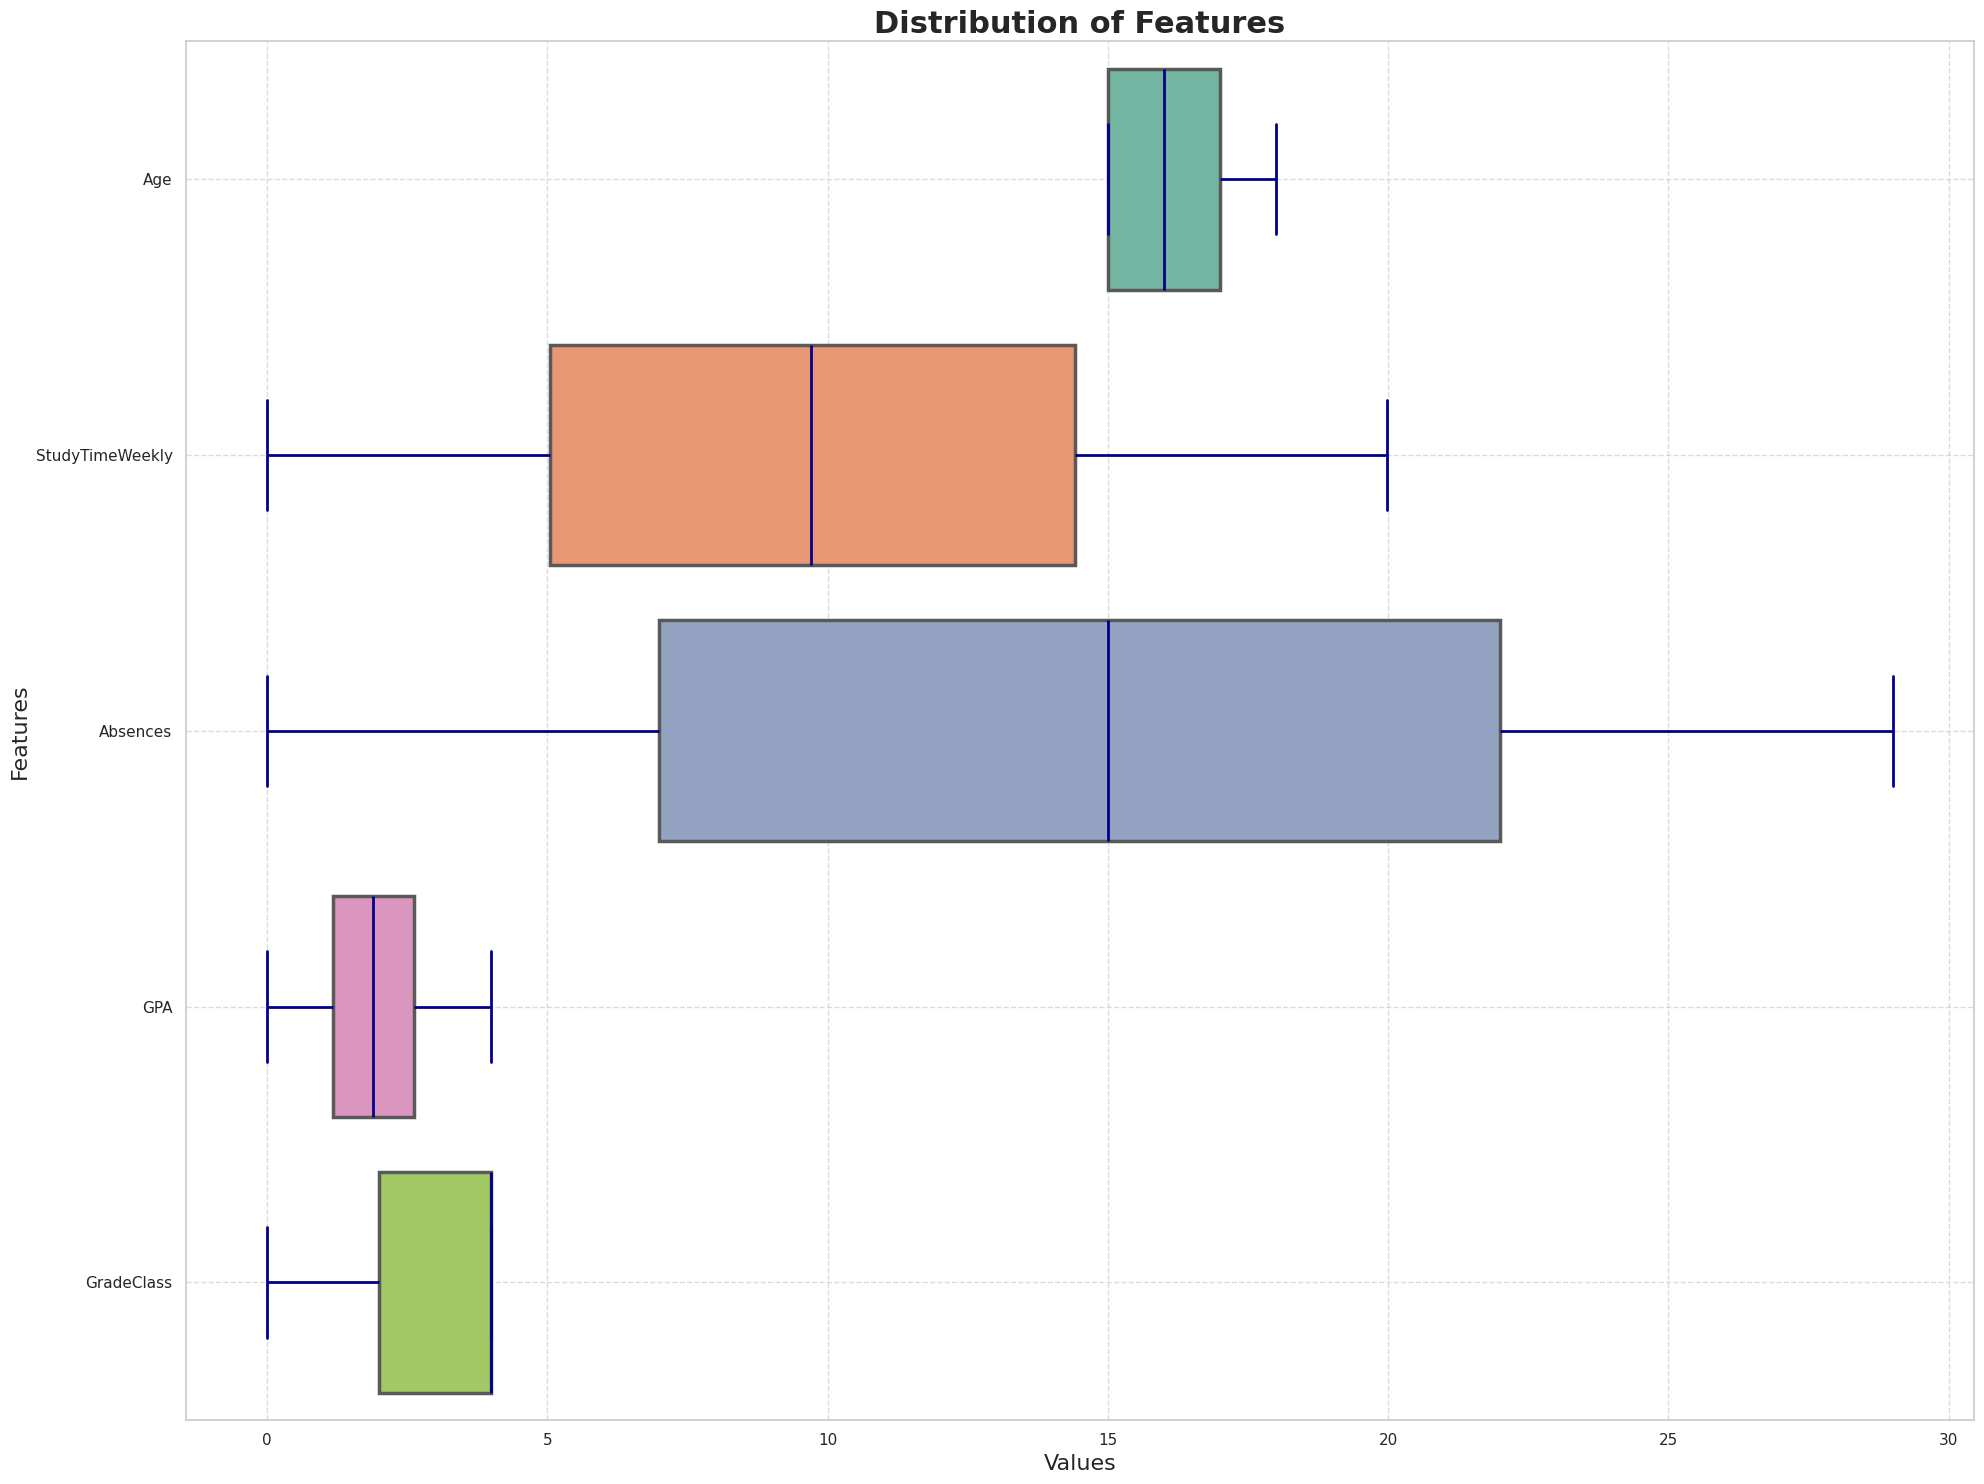

In [12]:
# Create a figure with a customized size and style
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

# Generate a boxplot with enhanced aesthetics
ax = sns.boxplot(data=df, orient='h', palette='Set2', linewidth=2.5)

# Customize the appearance of the boxplot
ax.set_title('Distribution of Features', fontsize=22, fontweight='bold')
ax.set_xlabel('Values', fontsize=16)
ax.set_ylabel('Features', fontsize=16)

# Customize boxplot elements
for patch in ax.artists:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    patch.set_facecolor('lightblue')

# Customize the median line
for line in ax.lines:
    line.set_color('darkblue')
    line.set_linewidth(2)

# Adjust grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#**2. Exploratory Data Analysis (EDA)**
<hr>
To gain deeper insights, we’ll focus on understanding how different variables in our dataset relate to one another. By analyzing these correlations, we can identify which factors tend to move together, uncover potential patterns, and determine how strongly certain variables influence each other. This step is crucial for building a comprehensive understanding of the dataset, allowing us to make informed decisions and develop more accurate models in subsequent stages of our analysis.

<ipython-input-13-b235bcffb9ee>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


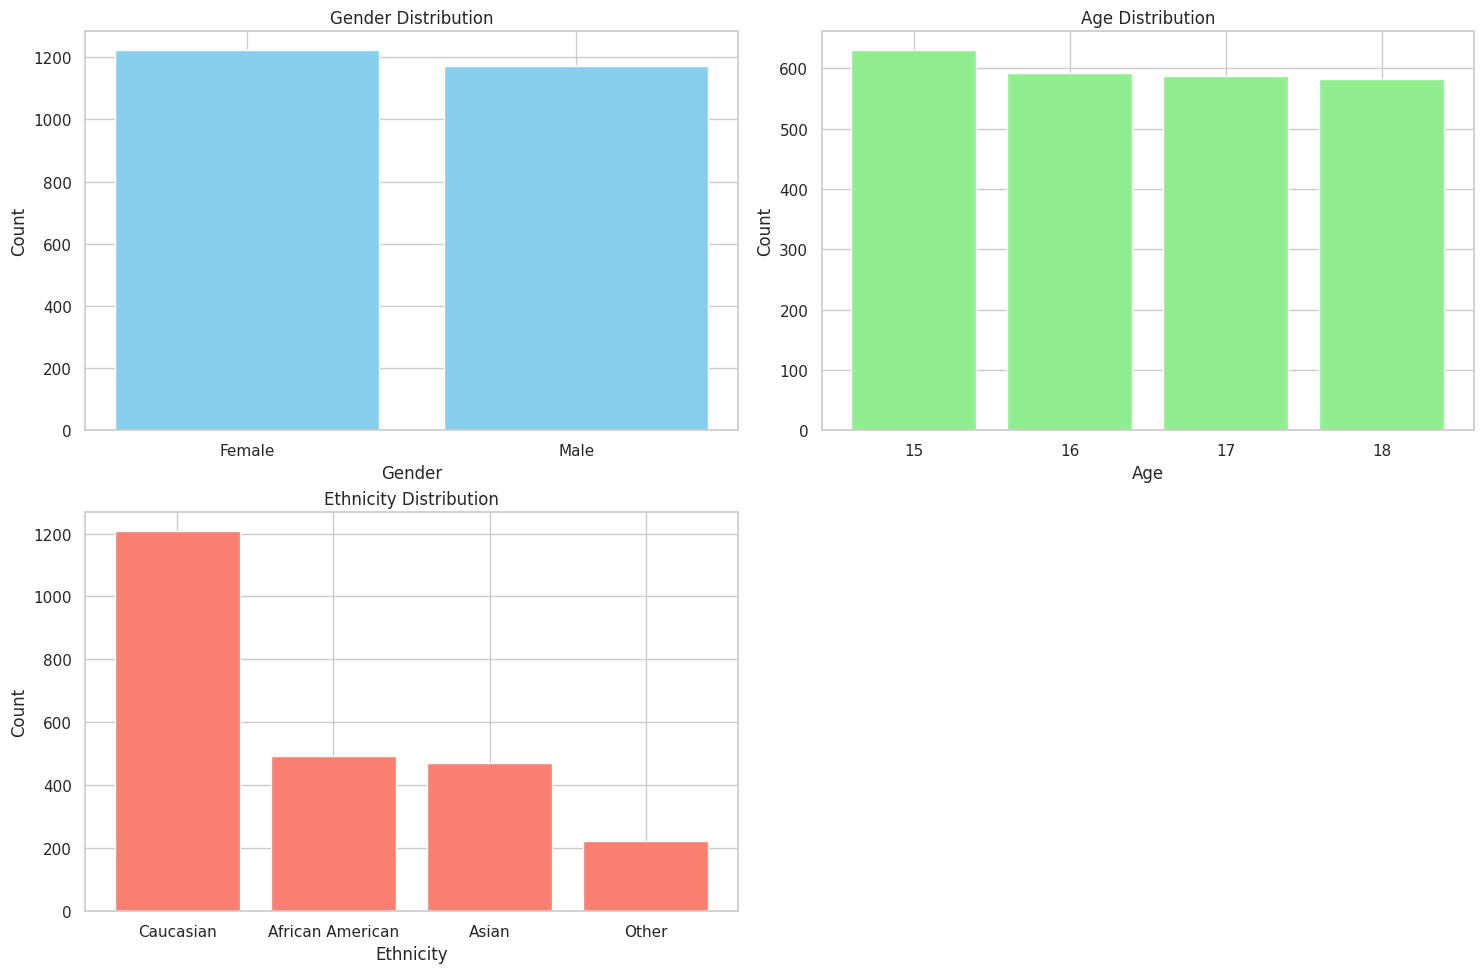

In [13]:
# Create subplots with a customized figure size and specified grid layout
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Define colors for each plot
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Plot Gender distribution
gender_counts = df['Gender'].value_counts()
ax[0, 0].bar(gender_counts.index, gender_counts.values, color=colors[0])
ax[0, 0].set_title('Gender Distribution')
ax[0, 0].set_xlabel('Gender')
ax[0, 0].set_ylabel('Count')

# Plot Age distribution
age_counts = df['Age'].value_counts().sort_index()
ages = [15, 16, 17, 18]
ax[0, 1].bar(age_counts.index, age_counts.values, color=colors[1])
ax[0, 1].set_title('Age Distribution')
ax[0, 1].set_xlabel('Age')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_xticks(ages)

# Plot Ethnicity distribution
ethnicity_counts = df['Ethnicity'].value_counts()
ax[1, 0].bar(ethnicity_counts.index, ethnicity_counts.values, color=colors[2])
ax[1, 0].set_title('Ethnicity Distribution')
ax[1, 0].set_xlabel('Ethnicity')
ax[1, 0].set_ylabel('Count')

# Remove the empty subplot and move Ethnicity distribution chart to the center
fig.delaxes(ax[1, 1])

# Adjust layout to place the Ethnicity chart in the center of the bottom row
ax[1, 0].set_position([0.15, 0.1, 0.35, 0.35])
ax[1, 1] = fig.add_axes([0.5, 0.1, 0.35, 0.35])  # Adding an empty axis for aesthetic alignment
ax[1, 1].axis('off')  # Hide the empty axis

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

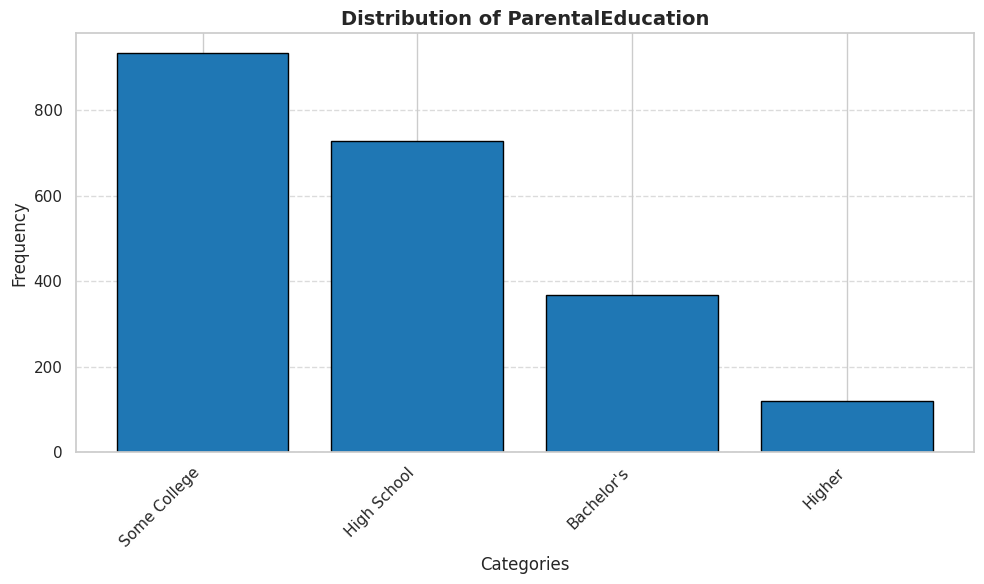

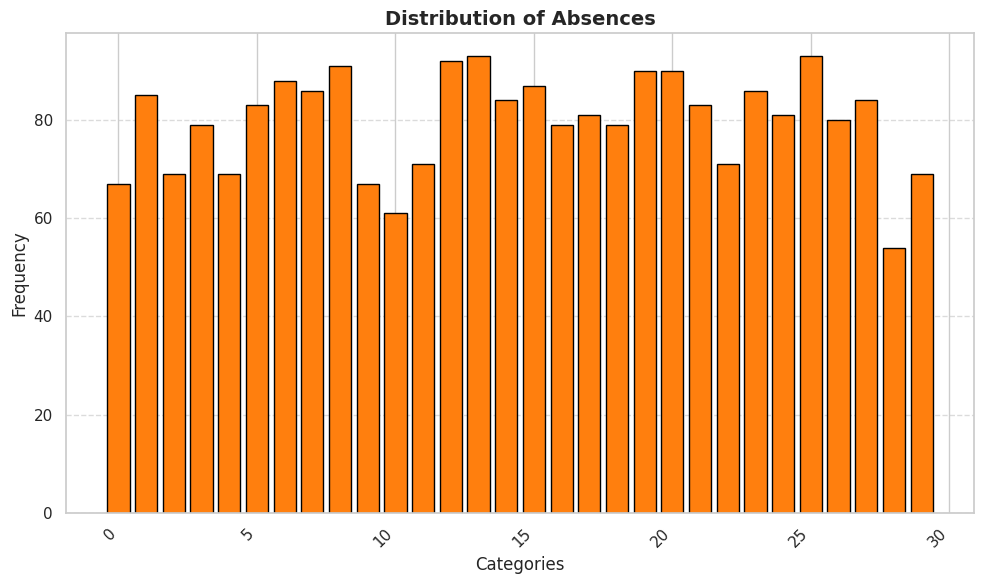

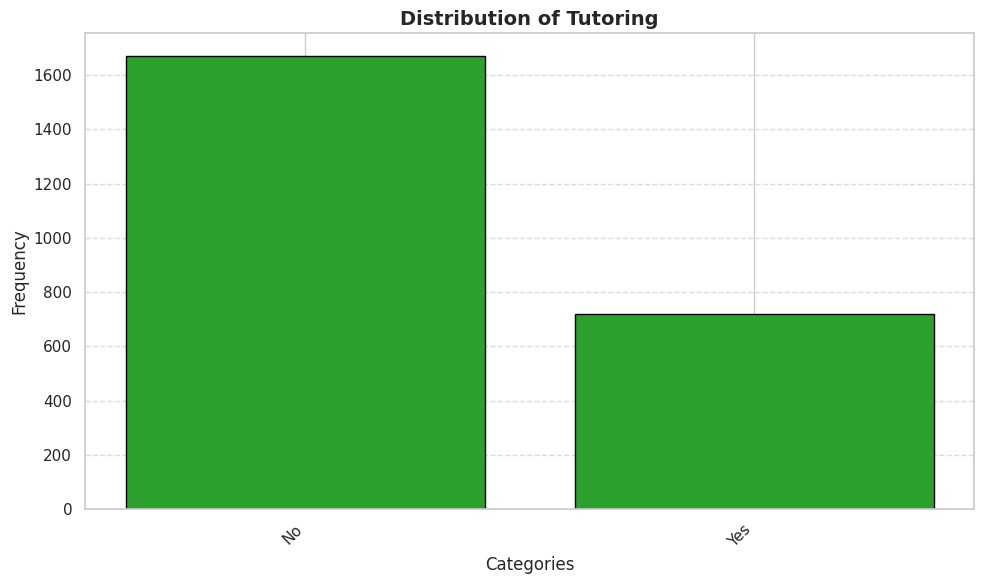

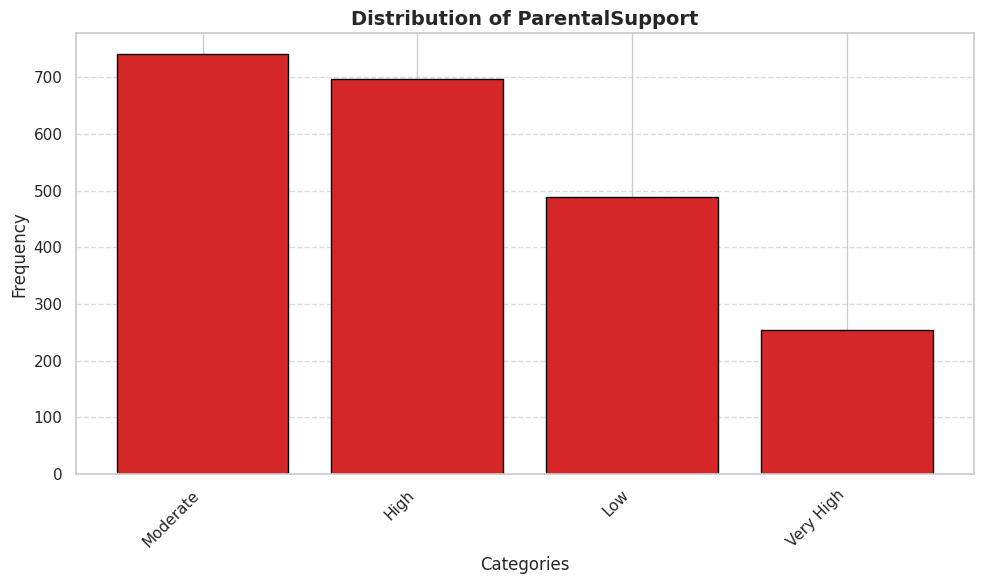

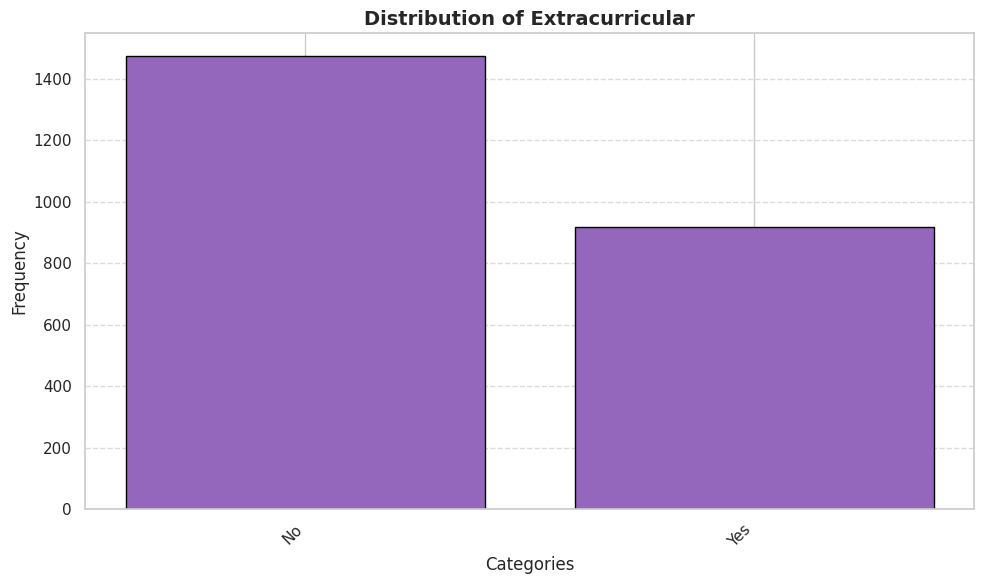

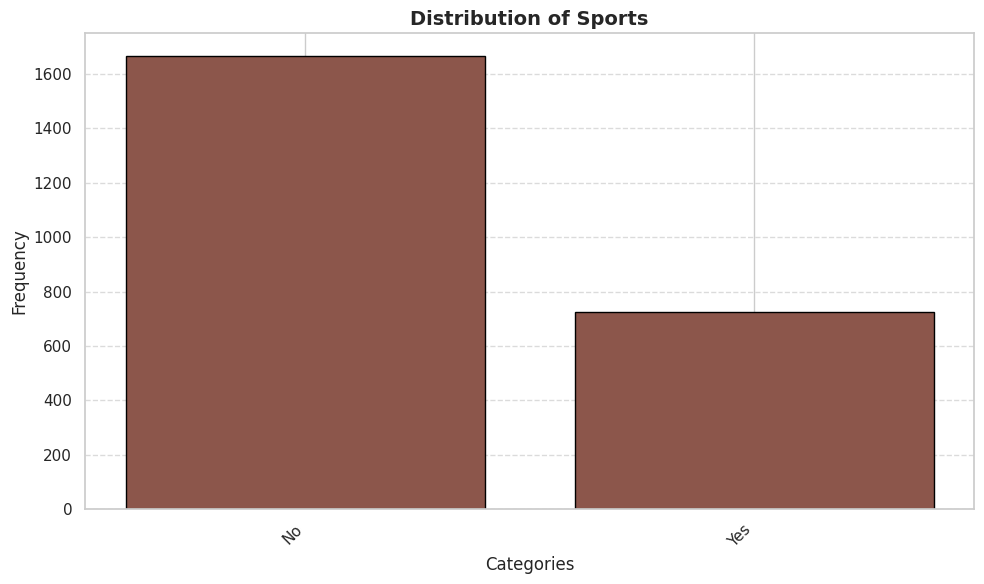

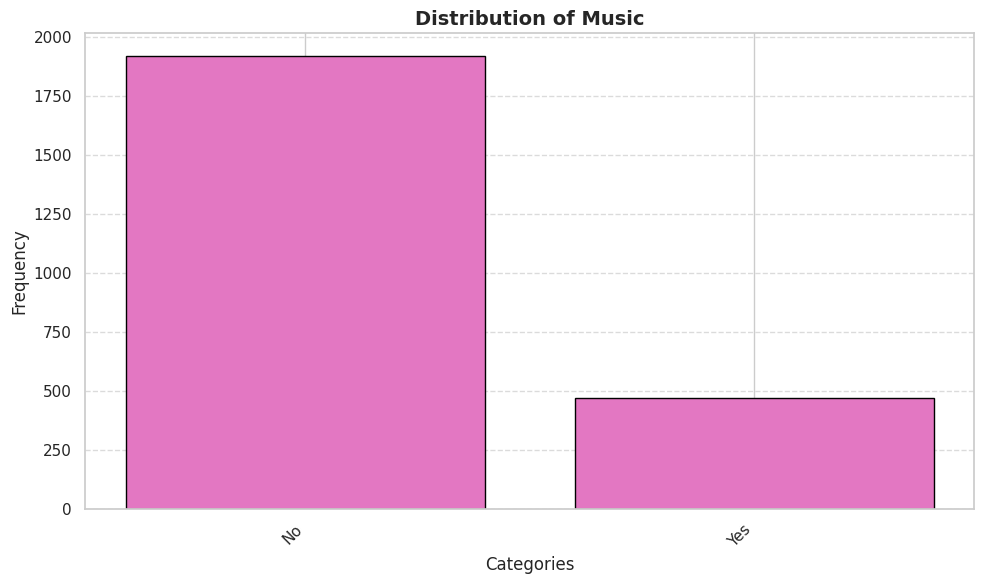

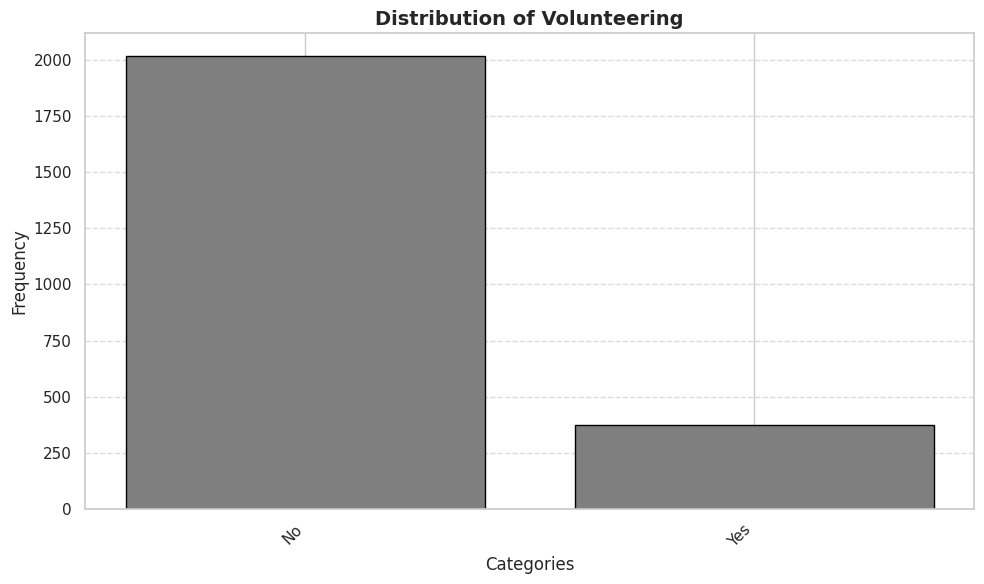

In [14]:
# Define the columns to analyze
columns = ['ParentalEducation', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Set up a color palette for the bar plots
colors = plt.get_cmap('tab10').colors

for idx, col in enumerate(columns):
    plt.figure(figsize=(10, 6))

    # Calculate value counts for the current column
    counts = df[col].value_counts()

    # Create a bar plot
    plt.bar(counts.index, counts.values, color=colors[idx % len(colors)], edgecolor='black')

    # Enhance the plot with labels and title
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [15]:
df_matrix1.corr()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
StudentID,1.000000,-0.042255,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500,0.014625,-0.014625,-0.003120,0.028838,-0.013322,-0.016584
Age,-0.042255,1.000000,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250,-0.044895,0.044895,0.027792,-0.020276,0.010054,-0.033391
ParentalEducation,-0.002307,0.025099,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031,-0.006771,0.006771,-0.017312,-0.012291,0.003438,0.042257
StudyTimeWeekly,0.026976,-0.006800,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131,-0.011469,0.011469,-0.004199,0.014193,-0.031638,0.030773
Absences,0.014841,-0.011511,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633,-0.021479,0.021479,0.031660,-0.023062,-0.006022,-0.014158
Tutoring,-0.007834,-0.012076,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695,0.031597,-0.031597,0.016736,-0.014867,0.012225,-0.024853
ParentalSupport,0.003016,0.033197,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823,-0.008065,0.008065,-0.001745,-0.032391,0.018394,0.022973
Extracurricular,-0.003611,-0.025061,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733,0.005964,-0.005964,-0.016711,0.046771,-0.009045,-0.024021
Sports,-0.020703,-0.046320,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654,0.008897,-0.008897,-0.000616,-0.001419,0.016819,-0.019991
Music,-0.005468,-0.003492,0.039439,0.007791,-0.008692,-0.011385,0.035122,-0.014191,-0.020474,1.000000,0.017224,0.073318,-0.036065,-0.007109,0.007109,0.017524,-0.015788,0.003847,-0.013453


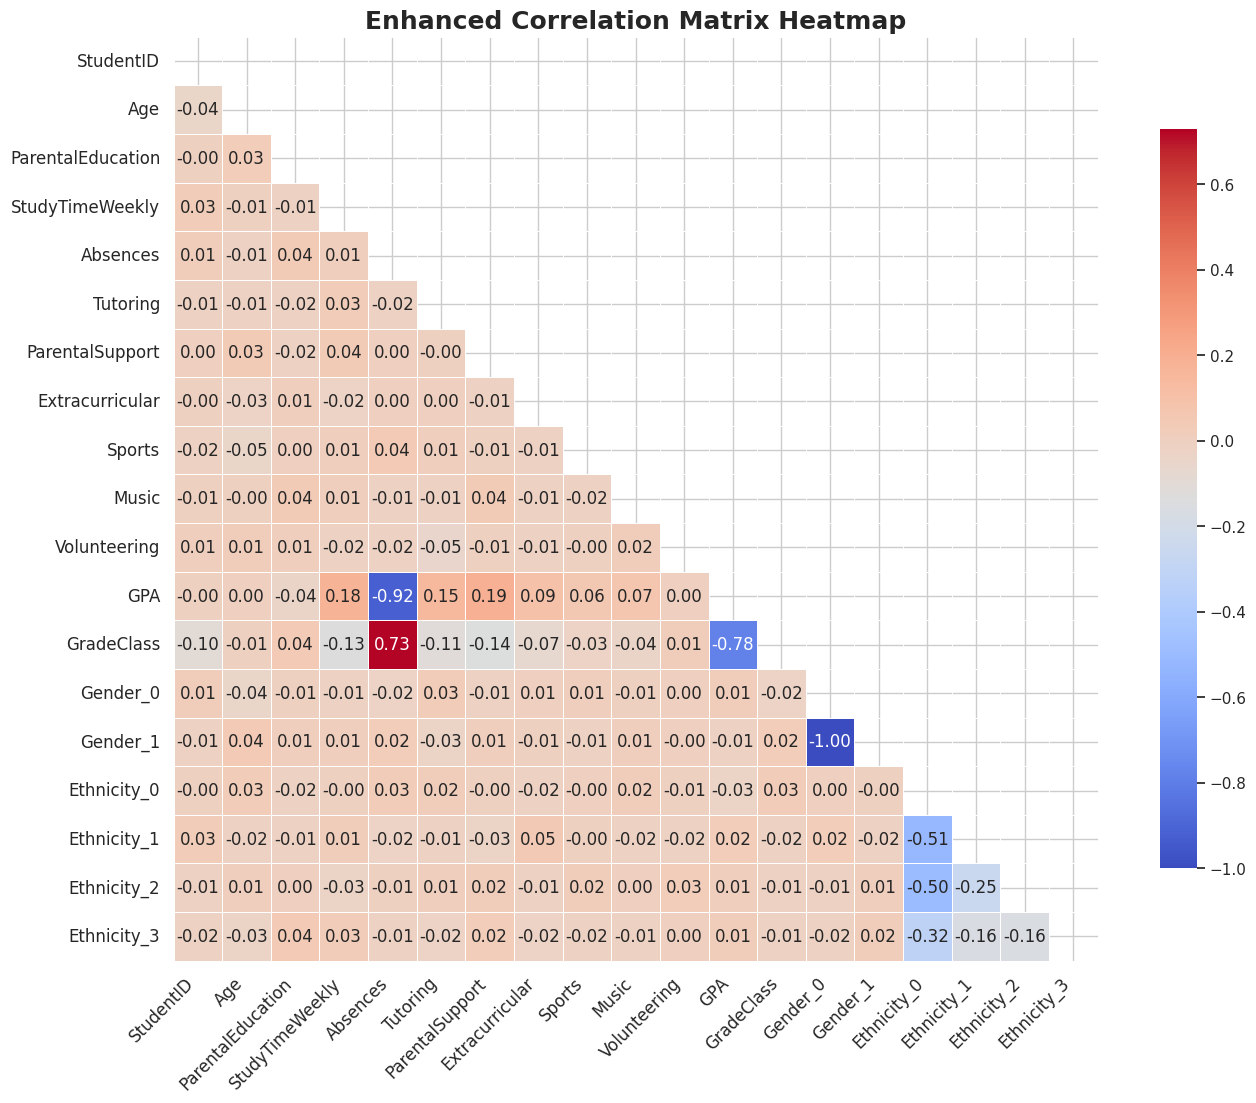

In [16]:
# Create a figure with a customized size
plt.figure(figsize=(16, 12))

# Generate a correlation matrix heatmap with enhanced features
sns.heatmap(
    df_matrix1.corr(),  # Correlation matrix
    annot=True,         # Annotate cells with correlation coefficients
    fmt=".2f",          # Format the annotations to two decimal places
    cmap='coolwarm',    # Use a 'coolwarm' color palette for a balanced view of correlations
    linewidths=0.5,     # Add grid lines between the cells
    linecolor='white',  # Set grid lines color to white for better contrast
    cbar_kws={"shrink": 0.8},  # Shrink color bar for better fit
    square=True,        # Make each cell square-shaped
    mask=np.triu(df_matrix1.corr())  # Mask the upper triangle for a cleaner look
)

# Customize the title and axis labels
plt.title('Enhanced Correlation Matrix Heatmap', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the heatmap
plt.show()

<Axes: >

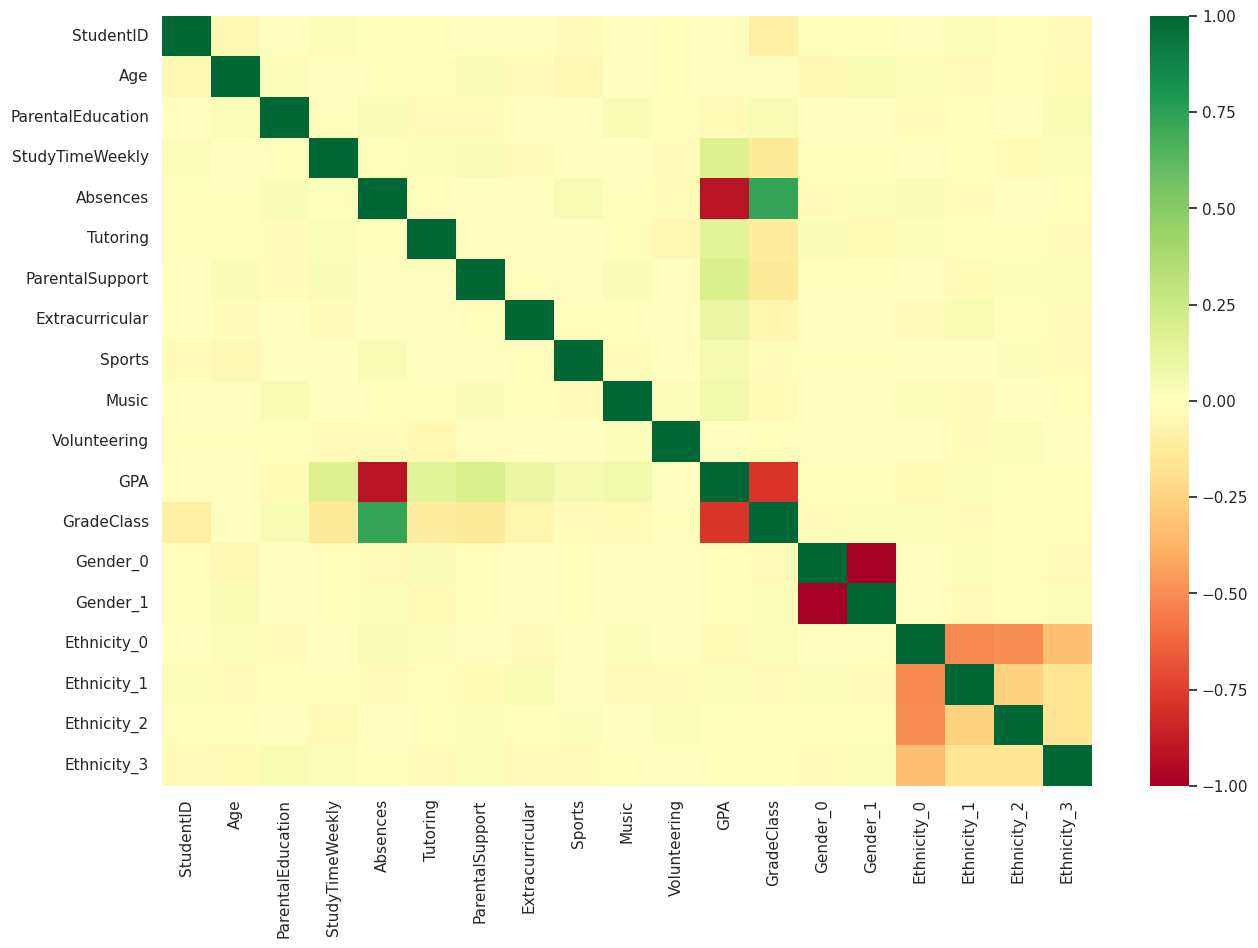

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df_matrix1.corr(),cmap='RdYlGn')

**Several key factors have the most substantial impact on GPA, and among them are Study Time Weekly, Absences, Tutoring, and Parental Support.**

In [18]:
np.corrcoef(df_matrix['StudyTimeWeekly'], df['GPA'])[1,0]

0.17927512685608818

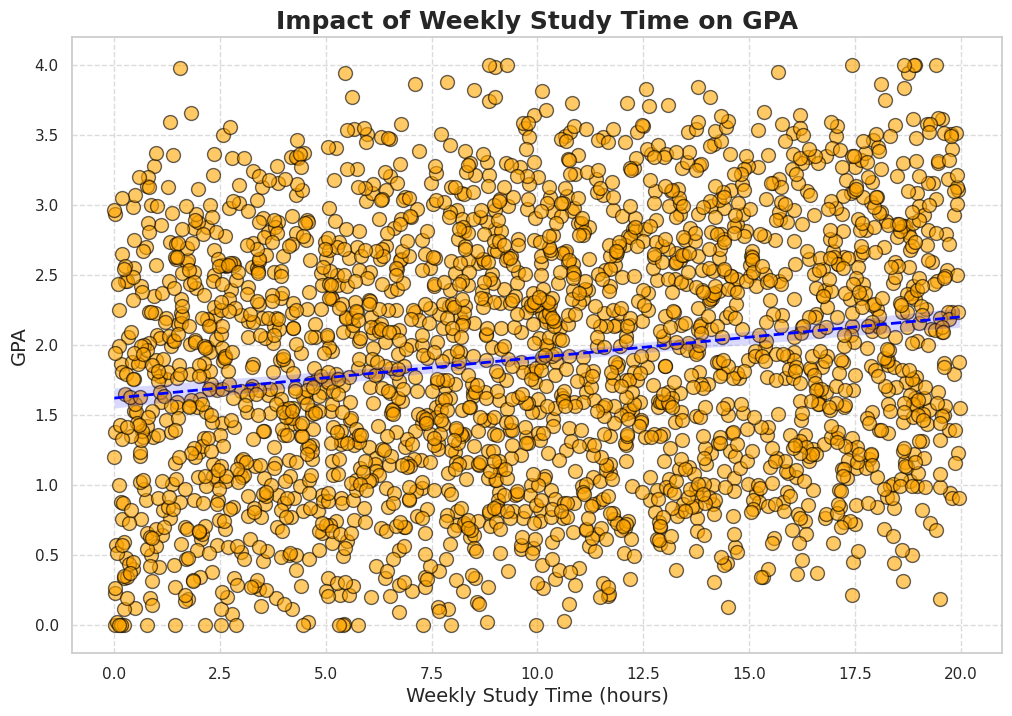

In [19]:
# Create a figure with a customized size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Generate a scatter plot with a regression line
sns.regplot(
    x='StudyTimeWeekly',
    y='GPA',
    data=df,
    scatter=True,
    fit_reg=True,
    line_kws={'color': 'blue', 'lw': 2, 'linestyle': '--'},  # Customize the regression line
    scatter_kws={'s': 100, 'color': 'orange', 'alpha': 0.6, 'edgecolor': 'black'}  # Customize scatter points
)

# Customize the title and axis labels
plt.title('Impact of Weekly Study Time on GPA', fontsize=18, fontweight='bold')
plt.xlabel('Weekly Study Time (hours)', fontsize=14)
plt.ylabel('GPA', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

**There is a low positive correlation between the amount of time a student dedicates to studying each week and their GPA.**

In [20]:
np.corrcoef(df_matrix['Absences'], df['GPA'])[1,0]

-0.9193135764208646

In [21]:
df.groupby('Absences').GPA.mean()

,GPA
Absences,
0,3.401790
1,3.254577
2,3.082517
3,3.092297
4,2.971374
5,2.801303
6,2.757924
7,2.618820
8,2.515815


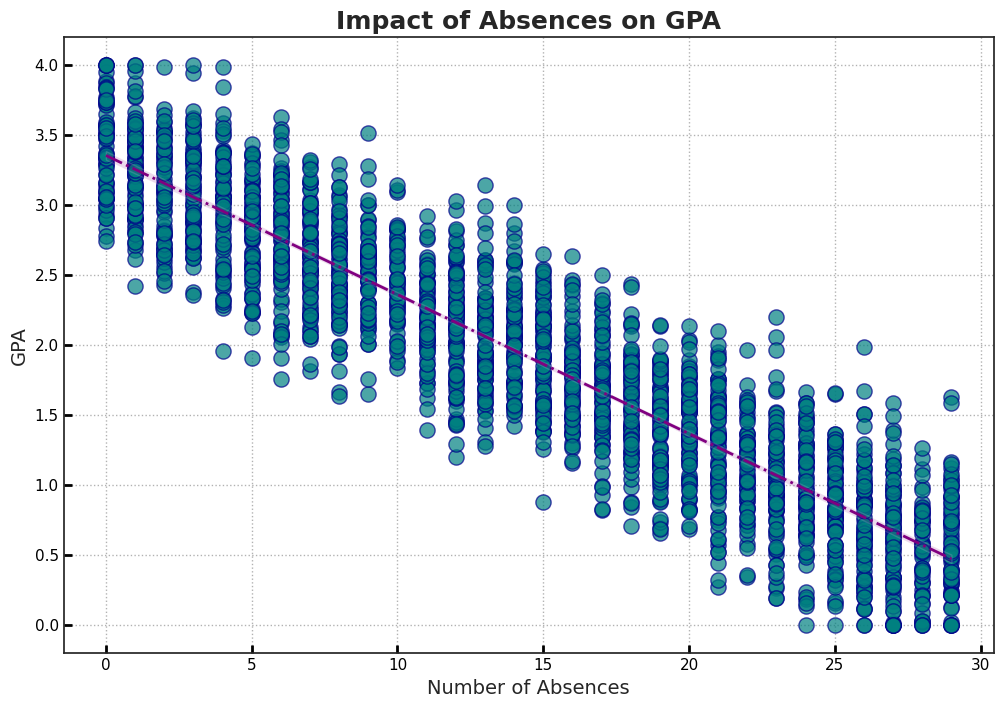

In [22]:
# Create a figure with a customized size and style
plt.figure(figsize=(12, 8))
sns.set_style("ticks")

# Generate a scatter plot with a regression line
sns.regplot(
    x='Absences',
    y='GPA',
    data=df,
    scatter=True,
    fit_reg=True,
    line_kws={'color': 'purple', 'lw': 2, 'linestyle': '-.'},  # Customize the regression line
    scatter_kws={'s': 120, 'color': 'teal', 'alpha': 0.7, 'edgecolor': 'darkblue'}  # Customize scatter points
)

# Customize the title and axis labels
plt.title('Impact of Absences on GPA', fontsize=18, fontweight='bold')
plt.xlabel('Number of Absences', fontsize=14)
plt.ylabel('GPA', fontsize=14)

# Add a grid with a custom style
plt.grid(True, linestyle=':', color='gray', alpha=0.6)

# Add ticks inside the plot for a cleaner look
plt.tick_params(axis='both', direction='in', length=6, width=2, colors='black')

# Display the plot
plt.show()

**Strong negative correlation to GPA — the more absences a student accumulates, the lower their GPA tends to be.**

In [23]:
df.groupby(['ParentalSupport', 'Tutoring']).GPA.mean()

ParentalSupport  Tutoring
High             No          1.957196
                 Yes         2.245512
Low              No          1.676359
                 Yes         1.933297
Moderate         No          1.778492
                 Yes         2.124766
Very High        No          2.104226
                 Yes         2.392266
Name: GPA, dtype: float64

<ipython-input-24-d1746ce9ba51>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


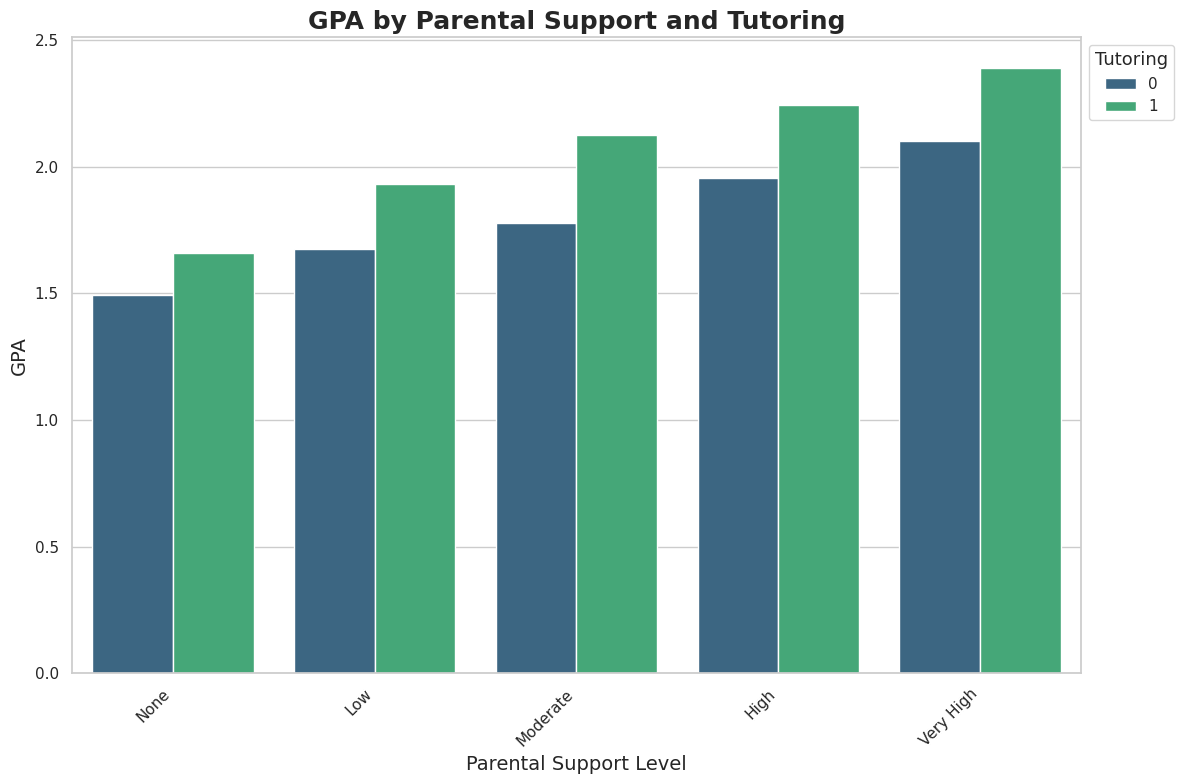

In [24]:
# Create a figure with a customized size and style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Generate a bar plot with hues
sns.barplot(
    x='ParentalSupport',
    y='GPA',
    hue='Tutoring',
    data=df_matrix,
    palette='viridis',  # Use a vibrant color palette for the bars
    ci=None  # Disable the confidence interval for a cleaner look
)

# Customize the x-axis labels
parental = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
plt.xticks(ticks=list(parental.keys()), labels=list(parental.values()), rotation=45, ha='right')

# Add a title and axis labels
plt.title('GPA by Parental Support and Tutoring', fontsize=18, fontweight='bold')
plt.xlabel('Parental Support Level', fontsize=14)
plt.ylabel('GPA', fontsize=14)

# Add a legend with a customized position
plt.legend(title='Tutoring', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()

**According to the data, students who receive higher levels of parental support and attend tutoring sessions tend to perform better academically.**

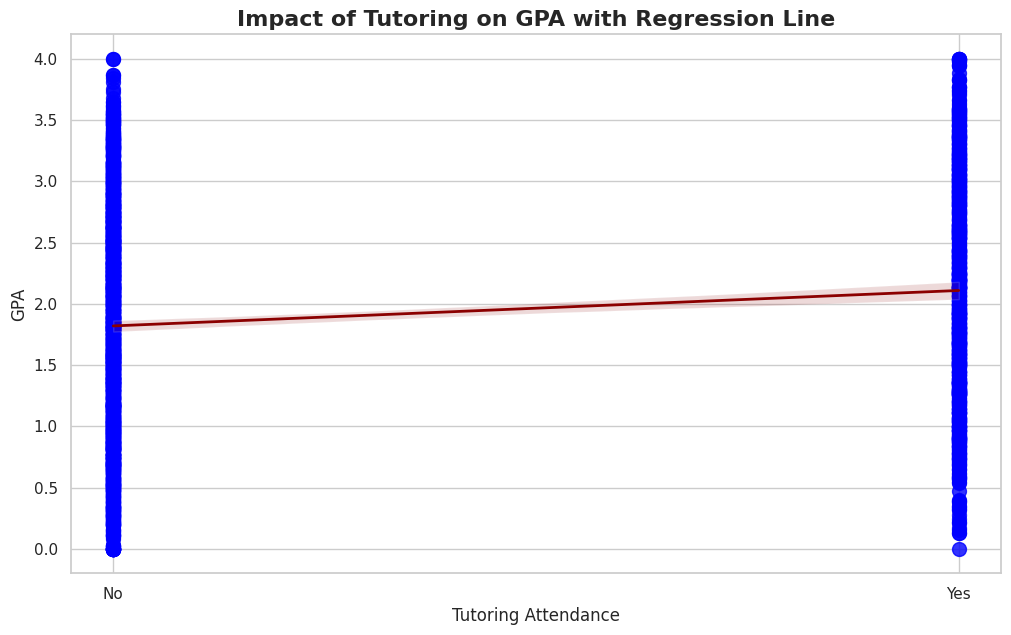

In [25]:
# Set up the figure with a specific size
plt.figure(figsize=(12, 7))

# Create the regression plot with a different color scheme and marker style
plot1 = sns.regplot(
    x='Tutoring',
    y='GPA',
    data=df_matrix,
    scatter=True,
    fit_reg=True,
    scatter_kws={'color': 'blue', 's': 100},  # Customizing scatter plot points
    line_kws={'color': 'darkred', 'lw': 2}    # Customizing the regression line
)

# Define the x-axis ticks as yes/no with labels
plot1.set_xticks([0, 1])
plot1.set_xticklabels(['No', 'Yes'])

# Add labels and title for better understanding
plot1.set_xlabel('Tutoring Attendance')
plot1.set_ylabel('GPA')
plot1.set_title('Impact of Tutoring on GPA with Regression Line', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

**Low positive correlation between tutoring support and GPA**

In [26]:
np.corrcoef(df_matrix['ParentalSupport'], df_matrix['GPA'])[1,0]

0.19077372781932933

In [27]:
df.groupby('ParentalSupport').GPA.mean()

,GPA
ParentalSupport,
High,2.042409
Low,1.755700
Moderate,1.884246
Very High,2.191545


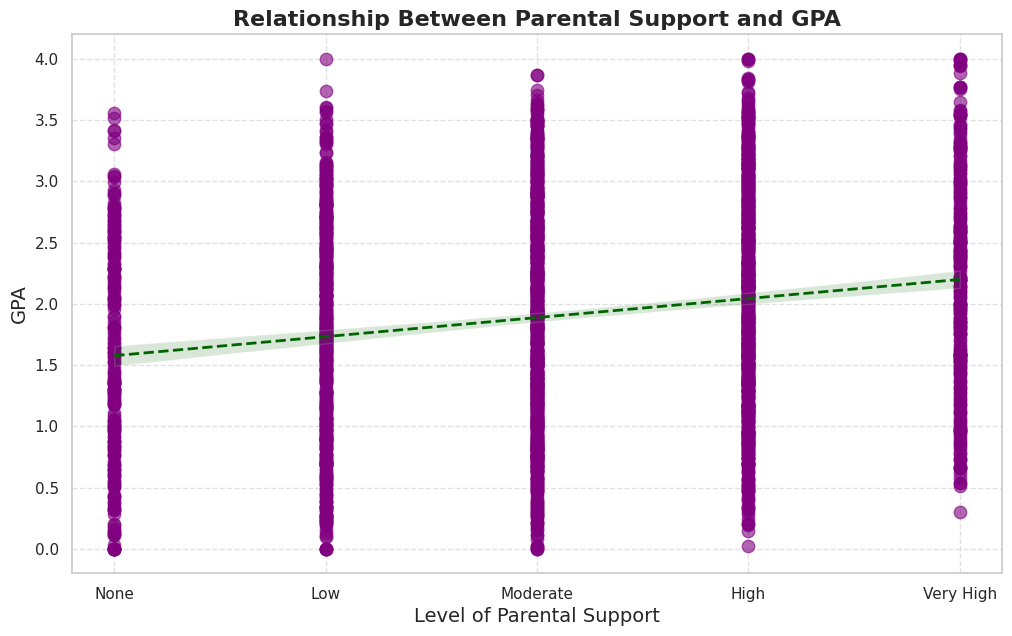

In [28]:
# Set up the figure with a specific size
plt.figure(figsize=(12, 7))

# Create the regression plot with enhanced visual settings
sns.regplot(
    x='ParentalSupport',
    y='GPA',
    data=df_matrix,
    scatter_kws={'color': 'purple', 's': 80, 'alpha': 0.6},  # Customizing scatter plot points
    fit_reg=True,
    line_kws={'color': 'darkgreen', 'lw': 2, 'linestyle': '--'}  # Customizing the regression line
)

# Define and set x-axis ticks with corresponding labels
parental_support_labels = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
plt.xticks(ticks=list(parental_support_labels.keys()), labels=list(parental_support_labels.values()))

# Add labels and title with enhanced formatting
plt.xlabel('Level of Parental Support', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('Relationship Between Parental Support and GPA', fontsize=16, fontweight='bold')

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


**Low positive correlation between parental support and GPA**

#**3. Data Visualization with TABLEAU**

By examining the visualizations and data patterns, we aim to draw meaningful conclusions and understand the underlying trends affecting the various aspects of student performance.

Data exploration can be performed on the Tableau dashboard below.

# ***Data exploration can be performed on the Tableau dashboard below.***

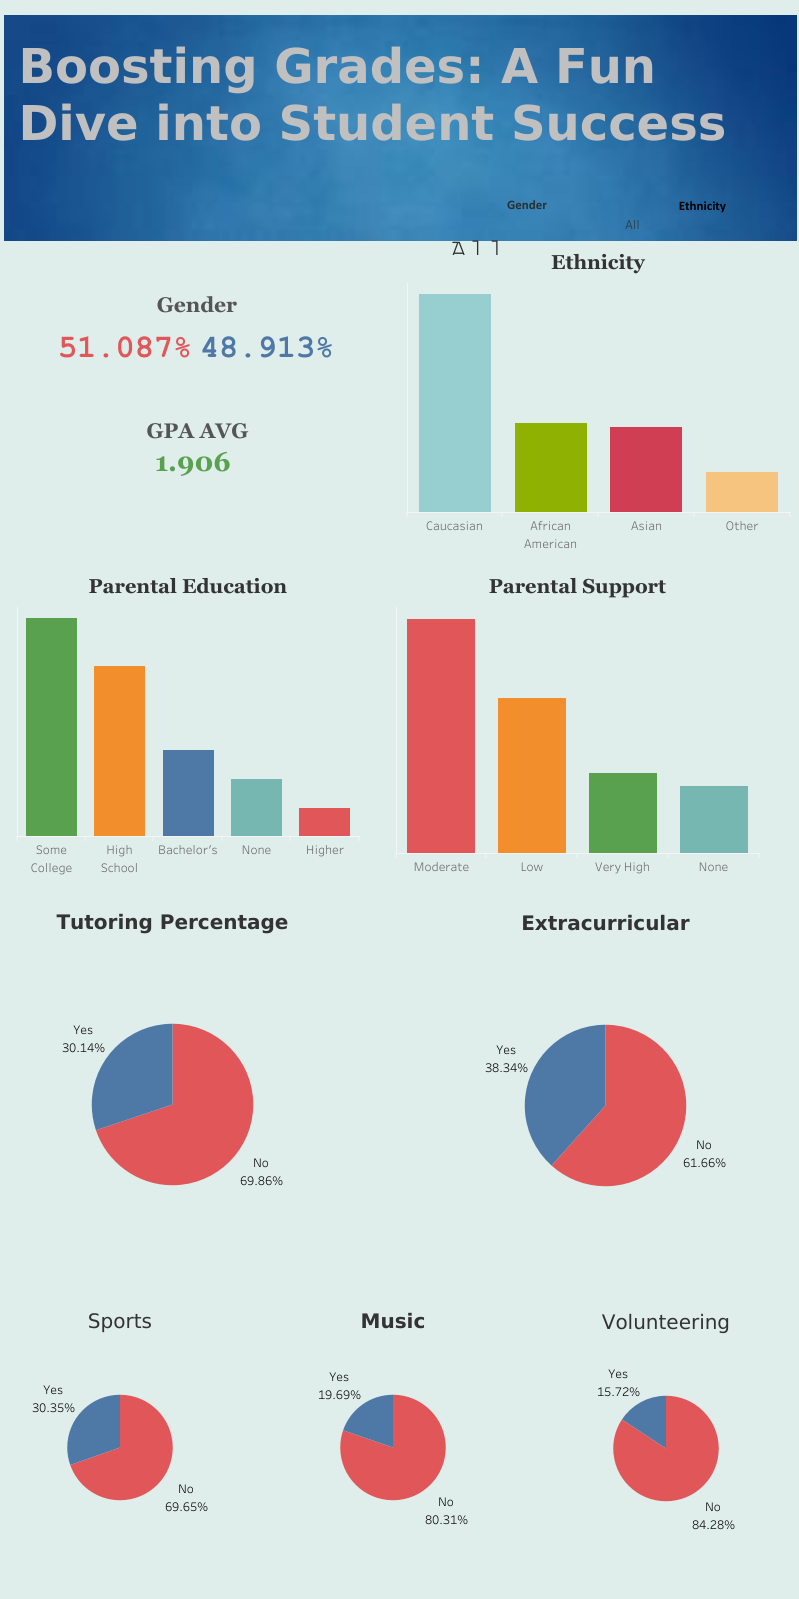

**Link Tableau:** https://public.tableau.com/app/profile/alan.dodi.amdani/viz/StudentPerformsnce/Dashboard2

In [31]:
# from google.colab import files

In [32]:
# # Menyimpan DataFrame sebagai file CSV
# df.to_csv('data.csv', index=False)

In [33]:
# # Menyimpan DataFrame sebagai file CSV
# df.to_csv('data.csv', index=False)

# # Mendownload file
# files.download('data.csv')